# Случайность - двигатель прогресса?

Рассмотрим самый биологически успешный бинарный вероятностный процесс - разделение на два пола.

В [статье из журнала "Reproduction in domestic animals"](http://onlinelibrary.wiley.com/doi/10.1111/j.1439-0531.2005.00562.x/abstract) {cite}`he2005` описан случай, когда небольшая популяция черных лебедей (Cygnus atratus) в неволе  на Исследовательской базе разведения гигантских панд в Чэнду отказывалась размножаться в течение 4-5 лет. Была высказана гипотеза, что вероятной причиной этого является ненормальное распределение по полу.

Когда проверили - все 7 оказались самки.
Проблема заключалась в том, что черный лебедь является примером сексуально мономорфных видов. Для определения пола пришлось разрабатывать метод, основанный на ПЦР.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pSex = 0.5
n = 7

Какая вероятность, что из 7 отобранных яиц вылупились все самки, если исходная вероятность рождения самки из яица такая же, как и самца?

$$ P(\forall x , x \in ♀ \ |\ p_♂ = p_♀) = ? $$ 



Поскольку события независимые, то вероятности нужно перемножать. Перемножение одинаковых вероятностей - это возведение в степень.

In [3]:
p7 = pSex**7
p7

0.0078125

Отношение одного исхода к другому называют шанс (odds).

In [7]:
odds = (1-p7)/p7
odds

127.0

Шансы, что так получилось случайно 1:127. Т.е. скорее всего повлиял какой-то фактор, вызвавший преобладание самок в выводке.

Какой должен быть процент самок в инкубаторе, чтобы чисто случайно можно было получить 7 самок из вытащенных наугад яиц?
Шанс случайного исхода примем традиционный $1:20$ , что соответствует уровню значимости 5%.

$$p=?, \ \ 
p^7 > 0.05$$


In [8]:
alpha=0.05
alpha**(1/7.0)

0.6518363448688391

Какое распределение полов следовало ожидать при таком проценте самок?

Проведем эксперимент с помощью генератора случайных чисел. Проверка гипотез путем многратной имитации исследуемого случайного процесса называется [метод "Монте-Карло"](https://ru.wikipedia.org/wiki/Метод_Монте-Карло).

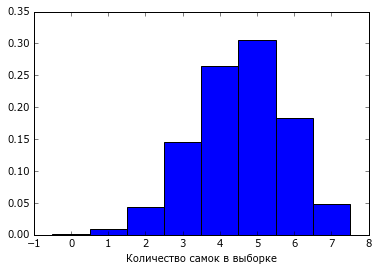

In [9]:
p=0.651836345
xx=arange(8)
P=zeros(8)
N=10000
for j in range(N):
    n=0
    for i in range(7):
        if random.random() < p:
            n+=1
    P[n]+=1

bar(xx-0.5, P/N, width=1.0); xlabel('Количество самок в выборке');

Конечно же существует специальная функция, которая генерит случайную выборку с заданной долей одного вида объектов из двух возможных. Такое распределение называется *биноминальное* : `bi` - два, `nomen` - имя.

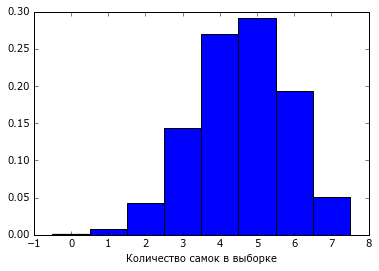

In [12]:
X = random.binomial(7, p, N)  # посмотрите справку о порядке аргументов
hist(X, arange(-0.5,8), normed=True);
xlabel('Количество самок в выборке');

Как видно из рисунка, при таком приблизительно двухкратном преобладании самок, скорее всего было бы 5 самок и два самца. Могло бы быть и 4 или 6 самок. Но только в 1 из 20 случаев было бы 7 самок, и это как раз соответствовало бы заданному нами $\alpha=0.05$.

Вот так из-за случайности зоологам пришлось разработать специальный метод определения пола лебедей.

:::{note}

Чёрный лебедь - знаковое животное для теории вероятности. Именно этот эпитет используют для обозначения изначально невероятных, но вполне реальных значимых исходов. 

После обнаружения живых черных лебедей этот термин стал использоваться для обозначения идеи о том, что воспринимаемая невозможность впоследствии может быть опровергнута.

> Чёрные лебеди были, хотя цивилизованные люди существовали на земле три тысячи лет, не встречаясь с ними... Следовательно, единообразный опыт жителей известного мира, согласных в общем результате, без единого известного случая отклонения от этого результата, не всегда достаточен для установления общего вывода.
*John Stuart Mill, A System of Logic (1843)*

> Через опыт мы можем судить о ложности некоего высказывания, но никогда о его истинности
*Карл Поппер, Логика научного исследования (1934)*


Отвергание нулевой гипотезы в классическом статанализе не означает подтверждение альтернативной гипотезы.



> ... должны ли мы на практике принимать единственный контрпример - например, одного обнаруженного черного лебедя - для опровержения весьма успешного закона. Я не полагаю, что мы должны обязательно так легко быть этим удовлетворены; мы вполне можем подозревать, что данный черный экземпляр перед нами не является лебедем.
*Карл Поппер, Логика научного исследования (1934)*

Обычно исследователь свободен в удалении из выборки неудачных экспериментов (артефактов). На этом построен механизм умышленной дефальсификации: Систематическое исключение редких нежелательных явлений дает впечатление подтверждения однобокой теории.


:::

:::{seealso}
Одноименную популярную теорию развил Нассим Николас Талеб. В своих работах он описывает случаи, когда выбросы имеют важное значение (статистики говорят: в распределении "жирные хвосты" (fat tails)). В этом случае общепринятые статистические законы не работают.

См. 
[Теория черного лебедя](https://ru.wikipedia.org/wiki/Чёрный_лебедь_(теория))

:::